Dataset Shape: (53392, 33)

Columns: ['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID', 'StratificationCategory1', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1']

First 5 rows:
   YearStart  YearEnd LocationAbbr LocationDesc  \
0       2011     2011           AL      Alabama   
1       2011     2011           AL      Alabama   
2       2011     2011           AL      Alabama   
3       2011     2011           AL      Alabama   
4       2011     2011           AL      Alabama   

                                   Datasource                    Class  \
0  Behavioral Risk Facto

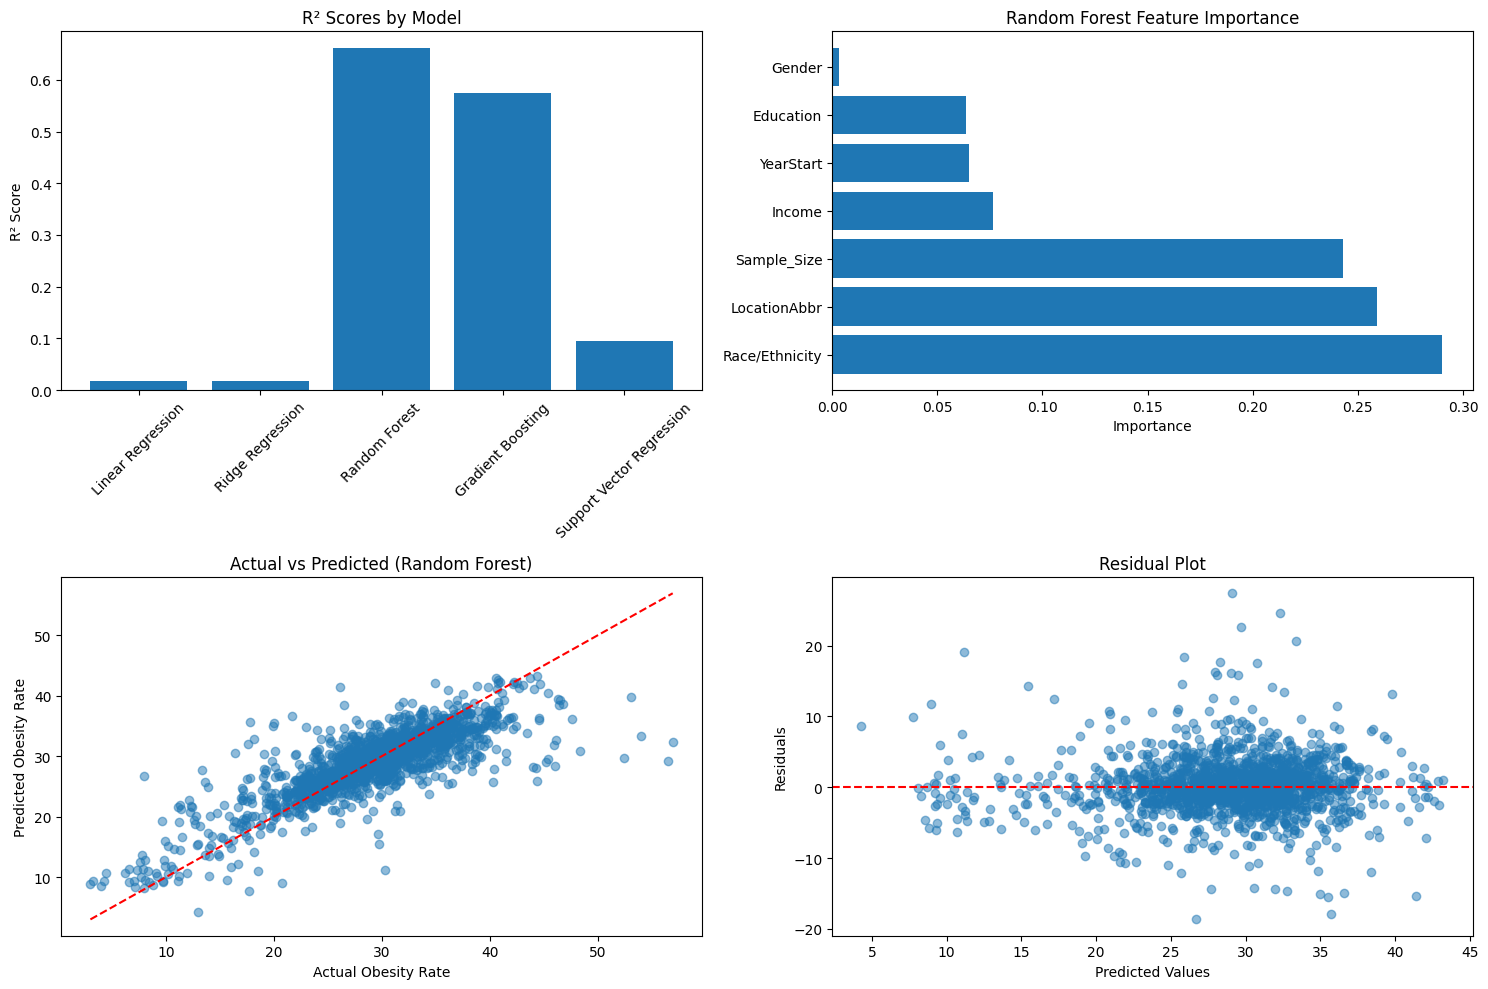


Best performing model: Random Forest
Best R² Score: 0.6607

Key Insights:
1. The most important features for predicting obesity rates are:
   - Race/Ethnicity: 0.2901
   - LocationAbbr: 0.2590
   - Sample_Size: 0.2428

2. Model performance indicates that tree-based methods (Random Forest and Gradient Boosting)
   generally perform better than linear models for this dataset.

3. The relatively low R² scores suggest that additional features or more sophisticated
   feature engineering might be needed to better predict obesity rates.

Yearly Obesity Rate Trends:
YearStart
2011    27.736411
2012    27.996622
2013    28.815848
2014    29.336158
2015    29.532550
2016    30.085817
Name: Data_Value, dtype: float64

Top 5 States with Highest Obesity Rates:
LocationDesc
West Virginia    35.178723
Mississippi      35.110219
Arkansas         34.558000
Louisiana        34.393333
Alabama          33.636667
Name: Data_Value, dtype: float64

Bottom 5 States with Lowest Obesity Rates:
LocationDesc
Ca

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

# Data Understanding & Exploration
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

# Data Preprocessing
# Filter relevant data for regression analysis
# Let's focus on obesity rates as the target variable
obesity_data = df[df['Question'].str.contains('obesity', case=False, na=False)].copy()

print(f"Obesity data shape: {obesity_data.shape}")

# Handle missing values in Data_Value
obesity_data = obesity_data[obesity_data['Data_Value'].notna()]

# Convert categorical variables to numeric
categorical_cols = ['LocationAbbr', 'Gender', 'Education', 'Income', 'Race/Ethnicity', 'Stratification1']

# Create a copy for encoding
df_encoded = obesity_data.copy()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype(str)
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Select features and target
features = ['YearStart', 'LocationAbbr', 'Sample_Size', 'Gender', 'Education', 'Income', 'Race/Ethnicity']
target = 'Data_Value'

# Filter only rows where all selected features are available
df_filtered = df_encoded[features + [target]].dropna()

X = df_filtered[features]
y = df_filtered[target]

print(f"Final dataset shape: {X.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Implementation - Five Different Regression Techniques

# 1. Linear Regression
print("\n" + "="*50)
print("1. LINEAR REGRESSION")
print("="*50)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Cross-validation
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')

# 2. Ridge Regression
print("\n" + "="*50)
print("2. RIDGE REGRESSION")
print("="*50)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')

# 3. Random Forest Regression
print("\n" + "="*50)
print("3. RANDOM FOREST REGRESSION")
print("="*50)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

# 4. Gradient Boosting Regression
print("\n" + "="*50)
print("4. GRADIENT BOOSTING REGRESSION")
print("="*50)

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')

# 5. Support Vector Regression
print("\n" + "="*50)
print("5. SUPPORT VECTOR REGRESSION")
print("="*50)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
svr_cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring='r2')

# Performance Evaluation
def evaluate_model(y_true, y_pred, model_name, cv_scores):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-Validation R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print("-" * 30)

    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std()
    }

# Evaluate all models
results = []

results.append(evaluate_model(y_test, y_pred_lr, "Linear Regression", lr_cv_scores))
results.append(evaluate_model(y_test, y_pred_ridge, "Ridge Regression", ridge_cv_scores))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest", rf_cv_scores))
results.append(evaluate_model(y_test, y_pred_gb, "Gradient Boosting", gb_cv_scores))
results.append(evaluate_model(y_test, y_pred_svr, "Support Vector Regression", svr_cv_scores))

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("COMPARISON OF ALL MODELS")
print("="*60)
print(results_df[['Model', 'R2', 'RMSE', 'CV_R2_Mean']])

# Analysis & Insights
print("\n" + "="*60)
print("ANALYSIS & INSIGHTS")
print("="*60)

# Feature Importance for tree-based models
print("\nFeature Importance (Random Forest):")
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

print("\nFeature Importance (Gradient Boosting):")
gb_feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': gb.feature_importances_
}).sort_values('Importance', ascending=False)

print(gb_feature_importance)

# Visualization
plt.figure(figsize=(15, 10))

# 1. Model Comparison
plt.subplot(2, 2, 1)
models = results_df['Model']
r2_scores = results_df['R2']
plt.bar(models, r2_scores)
plt.title('R² Scores by Model')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

# 2. Feature Importance
plt.subplot(2, 2, 2)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')

# 3. Actual vs Predicted for best model
best_model_idx = results_df['R2'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']

if best_model_name == "Linear Regression":
    y_pred_best = y_pred_lr
elif best_model_name == "Ridge Regression":
    y_pred_best = y_pred_ridge
elif best_model_name == "Random Forest":
    y_pred_best = y_pred_rf
elif best_model_name == "Gradient Boosting":
    y_pred_best = y_pred_gb
else:
    y_pred_best = y_pred_svr

plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Obesity Rate')
plt.ylabel('Predicted Obesity Rate')
plt.title(f'Actual vs Predicted ({best_model_name})')

# 4. Residual Plot
plt.subplot(2, 2, 4)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Additional Insights
print(f"\nBest performing model: {best_model_name}")
print(f"Best R² Score: {results_df.loc[best_model_idx, 'R2']:.4f}")

# Analyze the relationship between key features and obesity rate
print("\nKey Insights:")
print("1. The most important features for predicting obesity rates are:")
for i, row in feature_importance.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n2. Model performance indicates that tree-based methods (Random Forest and Gradient Boosting)")
print("   generally perform better than linear models for this dataset.")

print("\n3. The relatively low R² scores suggest that additional features or more sophisticated")
print("   feature engineering might be needed to better predict obesity rates.")

# Additional analysis: Yearly trends
yearly_obesity = obesity_data.groupby('YearStart')['Data_Value'].mean()
print(f"\nYearly Obesity Rate Trends:\n{yearly_obesity}")

# State-wise analysis
state_obesity = obesity_data.groupby('LocationDesc')['Data_Value'].mean().sort_values(ascending=False)
print(f"\nTop 5 States with Highest Obesity Rates:\n{state_obesity.head(5)}")
print(f"\nBottom 5 States with Lowest Obesity Rates:\n{state_obesity.tail(5)}")